In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns





In [ ]:
pd.options.display.max_rows = 10

In [ ]:
data = pd.read_csv("/content/boston_house_prices.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
list(data)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [ ]:
pd.isnull(data).sum().sum()

0

In [ ]:
data.mean()


CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
              ...    
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
MEDV        22.532806
Length: 14, dtype: float64

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
v = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print(v)

CRIM       66
ZN         68
INDUS       0
CHAS       35
NOX         0
           ..
TAX         0
PTRATIO    15
B          77
LSTAT       7
MEDV       40
Length: 14, dtype: int64


<Axes: >

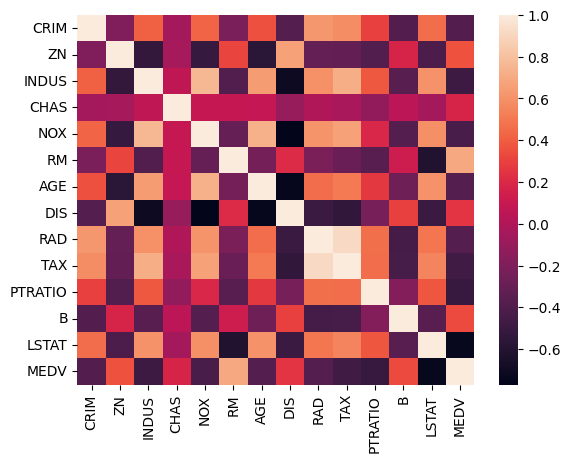

In [ ]:
sns.heatmap(data.corr())

In [ ]:
scaler = StandardScaler()
datan = scaler.fit_transform(data)
datan = pd.DataFrame(datan, columns=data.columns)

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
             ...   
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, Length: 14, dtype: float64
CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
             ...   
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Length: 14, dtype: float64
[[<Axes: title={'center': 'CRIM'}> <Axes: title={'center': 'ZN'}>
  <Axes: title={'center': 'INDUS'}> <Axes: title={'center': 'CHAS'}>]
 [<Axes: title={'center': 'NOX'}> <Axes: title={'center': 'RM'}>
  <Axes: title={'center': 'AGE'}> <Axes: title={'center': 'DIS'}>]
 [<Axes: title={'center': 'RAD'}> <Axes: title={'center': 'TAX'}>
  <Axes: title={'center': 'PTRATIO'}> <Axes: title={'center': 'B'}>]
 [<Axes: title={'center': 'LSTAT'}> <Axes: title={'center': 'MEDV'}>
  <Axes: > <Axes: >]]


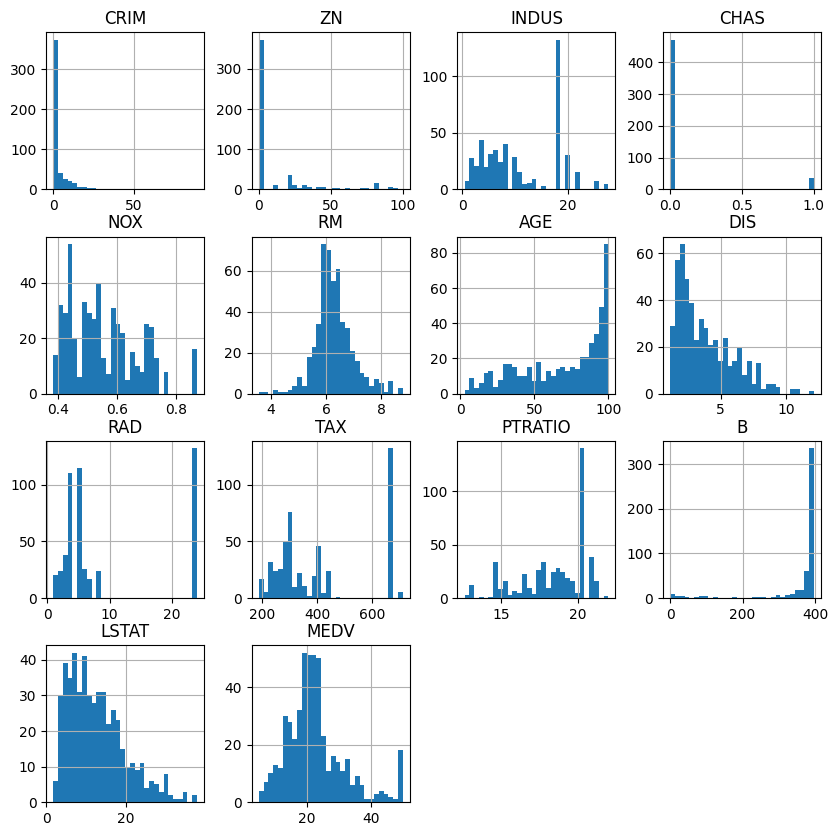

In [ ]:
cor_matrix = data.corr()
print(cor_matrix.MEDV)
print(data.corrwith(data.MEDV))
print(data.hist(figsize = (10,10), bins = 30))

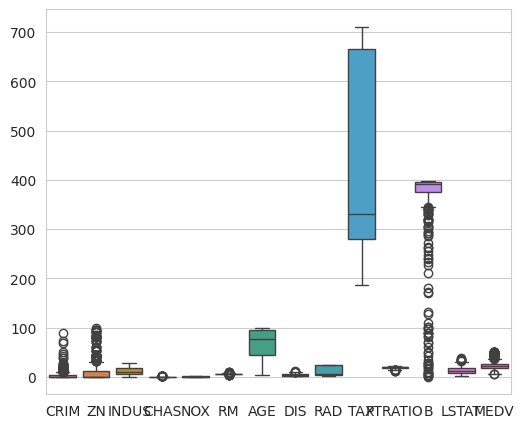

In [ ]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=data, orient='v')

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled = data_scaled.drop(columns=['TAX', 'RAD', 'INDUS', 'CRIM', 'RM', 'AGE'])

<Axes: >

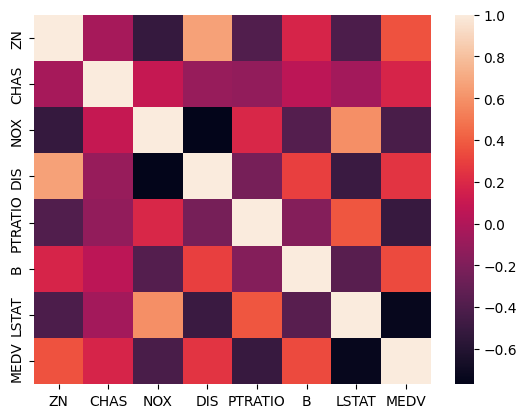

In [ ]:
min_value=0
max_value=1

data_scaled = (data-data.min())/(data.max()-data.min())*(max_value-min_value)+min_value
data_scaled = data_scaled.drop(columns=['TAX', 'RAD', 'INDUS', 'CRIM', 'RM', 'AGE'])
sns.heatmap(data_scaled.corr())

In [ ]:
X = data_scaled.drop('MEDV', axis=1)
y = data_scaled['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [ ]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)
test_predictions = regressor.predict(X_test)
print(test_predictions)

[ 0.61690503  0.59540277  0.4549519   0.47892846  0.66443625  0.33169235
 -0.09820528  0.25362752  0.37710123  0.28271579  0.27128317  0.23719396
  0.09610855  0.18523696  0.41105957  0.3435761   0.59370984  0.31824796
  0.63536667  0.09478859  0.23396025  0.2561361   0.44487968  0.26669633
  0.32276434  0.34759046  0.68630513  0.23725858  0.3397607   0.2502585
  0.54244915  0.10846328  0.58841451  0.11119924  0.26498423  0.5804358
  0.57160066  0.3707641   0.34242195  0.4777481   0.59659302  0.54053109
  0.47473608 -0.01047286  0.36770963  0.16750811  0.28922961  0.64826063
  0.50005202  0.27644671  0.44935531  0.57854221  0.38335495  0.24665796
  0.3707732   0.32234743 -0.02322706  0.8027604   0.13377776  0.22416187
 -0.14184873  0.63923261  0.31478602  0.39671903  0.54317518  0.54733021
  0.49146683  0.41966426  0.54738743  0.48917987  0.01161876  0.0887722
  0.54465554  0.63329769  0.56837158  0.44476918  0.50679747  0.3936996
  0.49082226  0.5409181   0.74019437  0.62998047  0.598

In [ ]:
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, test_predictions)))
print('test mse: ', mean_squared_error(y_test, test_predictions))
print('r2 score: ', r2_score(y_test, test_predictions))

MAE: 0.09016623459411903
RMSE: 0.1319552607656452
test mse:  0.017412190843729424
r2 score:  0.5835487227139587


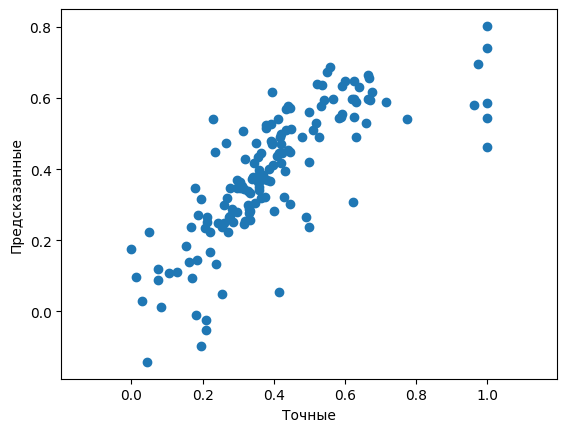

In [ ]:
plt.scatter(y_test, test_predictions)
plt.xlabel('Точные')
plt.ylabel('Предсказанные')
plt.axis('equal')
plt.show()

In [ ]:
cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
cv_r2_scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')

print('Cross-Validation RMSE:', cv_rmse_scores.mean())
print('Cross-Validation R^2:', cv_r2_scores.mean())

Cross-Validation RMSE: 0.12479106465962544
Cross-Validation R^2: 0.45140690491122504


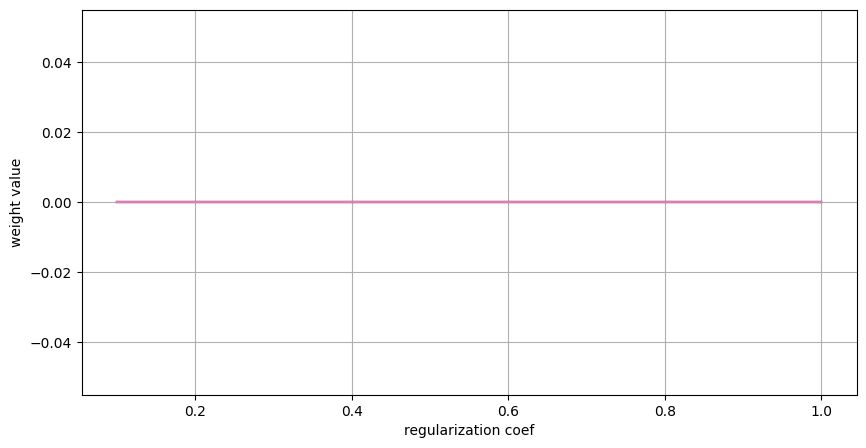

In [ ]:
alphas = np.linspace(0.1, 1, 100)

plt.figure(figsize=(10, 5))
weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    lasso_regressor = Lasso(alpha)
    lasso_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, lasso_regressor.coef_.reshape(-1, 1)))
plt.plot(alphas, weights.T)
plt.xlabel('regularization coef')
plt.ylabel('weight value')
plt.grid()
plt.show()

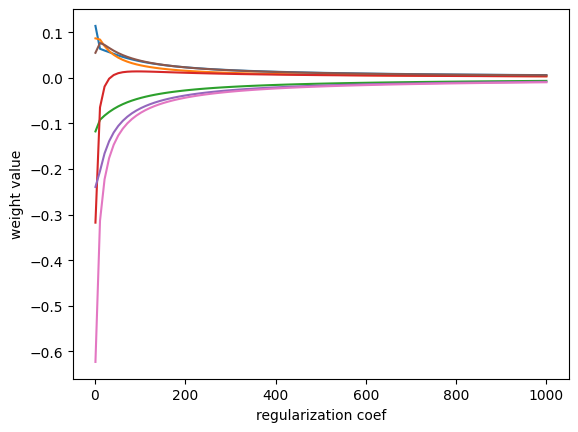

In [ ]:
alphas = np.linspace(1, 1000, 100)

weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    ridge_regressor = Ridge(alpha)
    ridge_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, ridge_regressor.coef_.reshape(-1, 1)))
plt.plot(alphas, weights.T)
plt.xlabel('regularization coef')
plt.ylabel('weight value')
plt.show()

In [ ]:
ridge = Ridge(0.1)
ridge.fit(X_train, y_train)
print('\n r2 score ridge: ', r2_score(y_test, ridge.predict(X_test)))
print('test mse ridge: ', mean_squared_error(y_test, ridge.predict(X_test)))

lasso = Lasso(0.1)
lasso.fit(X_train, y_train)
print('\n r2 score lasso: ', r2_score(y_test, lasso.predict(X_test)))
print('test mse lasso: ', mean_squared_error(y_test, lasso.predict(X_test)))


 r2 score ridge:  0.5858162406308296
test mse ridge:  0.017317383943466245

 r2 score lasso:  -0.005552751624215535
test mse lasso:  0.04204303689214537
